In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

###### Importing the pandas library to work with data
###### Importing the pyplot module from the matplotlib library to create graphs and visualizations
###### scipy.signal.find_peaks: Used for detecting peaks in the DAS data along the depth axis 

In [14]:
data = pd.read_csv('Section 3 data.csv',header=None)

chunk_size = 10000
dataset = pd.read_csv('Section 3 data.csv', chunksize=chunk_size,header=None)


dataframes = []

for i in dataset:
    dataframes.append(i)

full_dataset = pd.concat(dataframes, ignore_index=True)

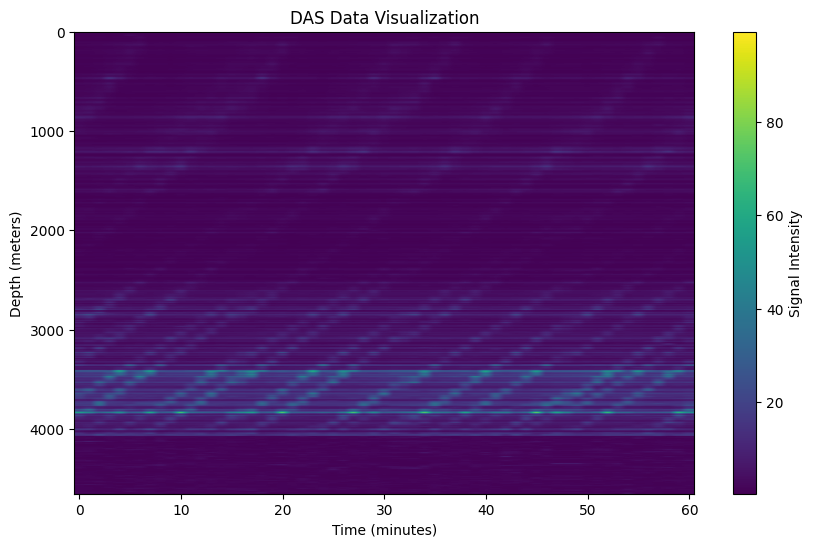

                0            1            2            3            4   \
count  4654.000000  4654.000000  4654.000000  4654.000000  4654.000000   
mean      4.752568     4.747600     4.828753     4.897420     4.950324   
std       6.090034     6.087201     6.234777     6.312051     7.157826   
min       0.544619     0.560788     0.552840     0.505436     0.530923   
25%       1.385339     1.342778     1.414175     1.398699     1.404528   
50%       2.402582     2.352000     2.433020     2.382074     2.363221   
75%       5.199934     5.235853     5.148476     5.366517     5.335374   
max      70.807121    55.407410    47.104305    48.785011    80.458168   

                5            6            7            8            9   ...  \
count  4654.000000  4654.000000  4654.000000  4654.000000  4654.000000  ...   
mean      4.636203     4.686271     4.815939     4.563417     4.608706  ...   
std       5.528529     5.976498     7.142218     5.366266     5.394519  ...   
min       0.56521

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(full_dataset, aspect='auto', cmap='viridis') # "imshow()" function from matplotlib is used to visualize the DAS data:
plt.colorbar(label='Signal Intensity')
plt.xlabel('Time (minutes)')
plt.ylabel('Depth (meters)')
plt.title('DAS Data Visualization')
plt.show()

print(full_dataset.describe())

###### Do data observations: some statistical analysis to get to know your data as well as various types of visualizations and insights from them 

<p align="center">
  <img src="ss.png" style="width: 280px;" />
</p>

In [16]:
def detect_lines(data):
    lines = []
    for i in range(full_dataset.shape[0]):
        peaks, _ = find_peaks(full_dataset.iloc[i, :], height=0)
        if len(peaks) > 0:
            lines.append((i, peaks))
    return lines

lines = detect_lines(full_dataset)


###### The detect_lines function detects peaks in the signal intensity along the depth axis:
##### Input: data, which is the full dataset.
##### Output: A list of tuples, where each tuple contains the depth index and the corresponding peaks detected at that depth.

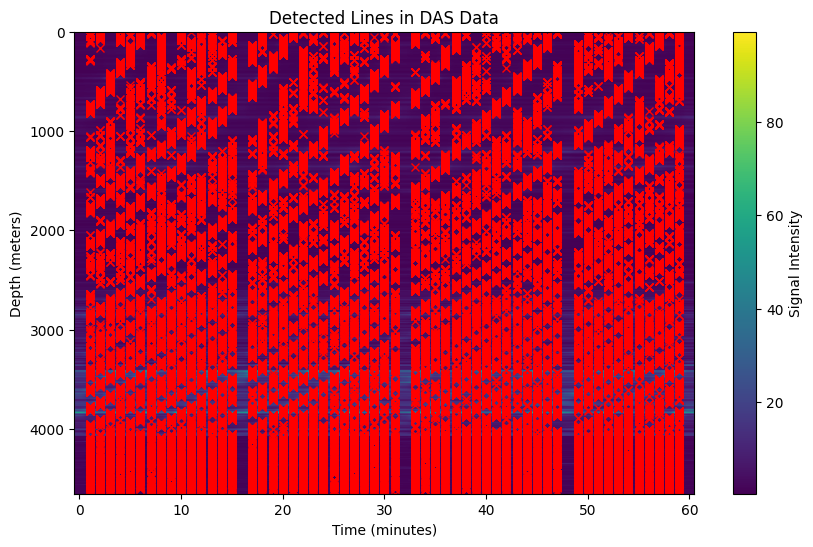

Depth: 0, Peaks: [ 1  4  7 11 13 15 18 21 24 28 34 37 42 45 47 50 54 58]
Depth: 1, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 40 42 45 50 54 58]
Depth: 2, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 40 42 45 50 54 58]
Depth: 3, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 40 42 45 50 54 58]
Depth: 4, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 40 42 45 50 54 58]
Depth: 5, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 42 45 47 50 54 58]
Depth: 6, Peaks: [ 1  4  7 13 15 18 21 24 28 34 37 42 45 47 50 54 58]
Depth: 7, Peaks: [ 1  7 13 15 18 22 24 34 37 42 45 47 50 54 58]
Depth: 8, Peaks: [ 1  7 13 15 18 22 24 34 37 42 45 47 50 54 57]
Depth: 9, Peaks: [ 1  7 13 15 18 22 24 34 36 42 45 47 50 54 57]
Depth: 10, Peaks: [ 1  7 13 15 18 22 24 26 31 34 36 42 45 47 50 54 57]
Depth: 11, Peaks: [ 1  7 13 15 18 22 24 26 31 34 36 42 45 47 50 54 57 59]
Depth: 12, Peaks: [ 1  6 12 15 18 22 26 31 34 36 42 45 47 50 54 56 59]
Depth: 13, Peaks: [ 1  6 12 15 18 22 26 31 34 36 42 45 47 50 54 56 59]
Depth: 14, Peaks: [ 1  6 12 

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(data, aspect='auto', cmap='viridis')
for line in lines:
    for peak in line[1]:
        plt.plot(peak, line[0], 'rx')
plt.colorbar(label='Signal Intensity')
plt.xlabel('Time (minutes)')
plt.ylabel('Depth (meters)')
plt.title('Detected Lines in DAS Data')
plt.show()

for line in lines:
    print(f"Depth: {line[0]}, Peaks: {line[1]}")

###### The detected peaks are visualized on top of the DAS data
###### Red Crosses ('rx'): Represent the detected peaks (signal lines) in the DAS data.
##
##
###### Description of the properties of the detected lines (part of the code output)
<p align="center">
  <img src="ss1.png" style="width: 280px;" />
</p>
